$$\text{Name : Fernando I.A.M.D}$$
$$\text{IndexNo : 190172K}$$

In [2]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline 

# Q1

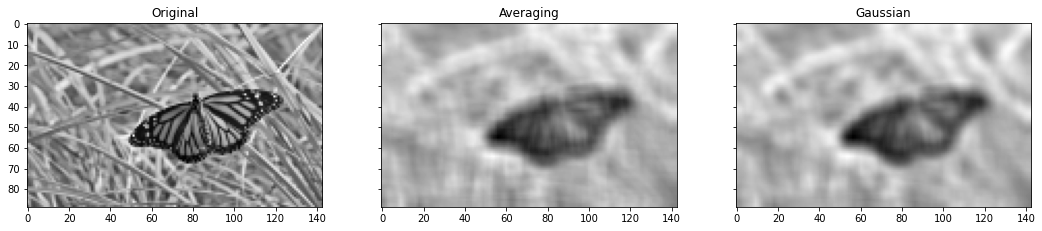

In [32]:
img = cv2.imread("butterfly.jpg",cv2.IMREAD_REDUCED_GRAYSCALE_8)
assert img is not None

#Averaging 
kernel = np.ones((9,9),np.float32)/81
imgc = cv2.filter2D(img,-1,kernel)

#Gaussian blur
blur = cv2.GaussianBlur(img,(9,9),4)

fig,axes = plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap="gray")
axes[0].set_title("Original")
#axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc,cmap="gray")
axes[1].set_title("Averaging")
#axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(blur,cmap="gray")
axes[2].set_title("Gaussian")
#axes[2].set_xticks([]),axes[2].set_yticks([])
plt.show()


# Q2

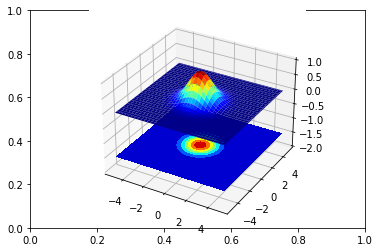

In [84]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sigma = 1
fig,ax = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')
step = 0.1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(X, Y)
g = np.exp(-(XX ** 2 + YY **2)/(2*sigma**2))
surf = ax.plot_surface(XX, YY, g, cmap = cm.jet)

cset = ax.contourf(XX, YY , g, zdir = 'z', offset = np.min(g)-1.5, cmap = cm.jet)
ax.set_zlim(np.min(g)-2, np.max(g))

plt.show()


# Q3

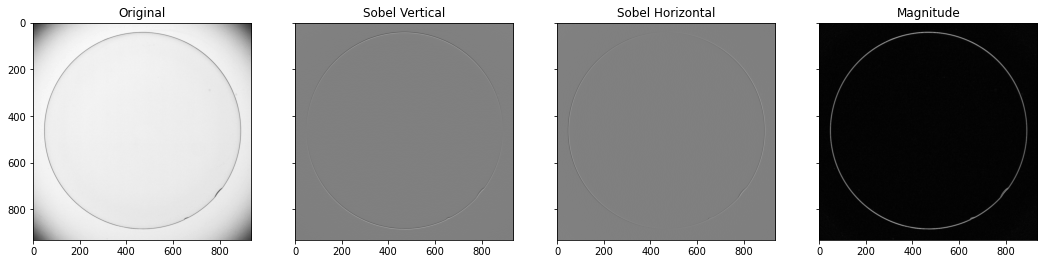

In [44]:
img = cv2.imread("contact_lens.tif",cv2.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#sobel verical
kernelver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')
imgv = cv2.filter2D(img,-1,kernelver)

#sobel horizontal 
kernelhor = np.array([(-1,0,1),(0,0,0),(-2,0,2)],dtype='float')
imgh = cv2.filter2D(img,-1,kernelhor)
mag = np.sqrt(imgv**2+imgh**2)

fig,axes = plt.subplots(1,4,sharex='all',sharey='all',figsize=(18,18))
axes[0].imshow(img,cmap = 'gray',vmin=0,vmax=255)
axes[0].set_title("Original")
#axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgv,cmap = 'gray',vmin=-1020,vmax=1020)
axes[1].set_title("Sobel Vertical")
#axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imgh,cmap = 'gray',vmin=-1020,vmax=1020)
axes[2].set_title("Sobel Horizontal")
#axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(mag,cmap = 'gray')
axes[3].set_title("Magnitude")
plt.show()

# Q4

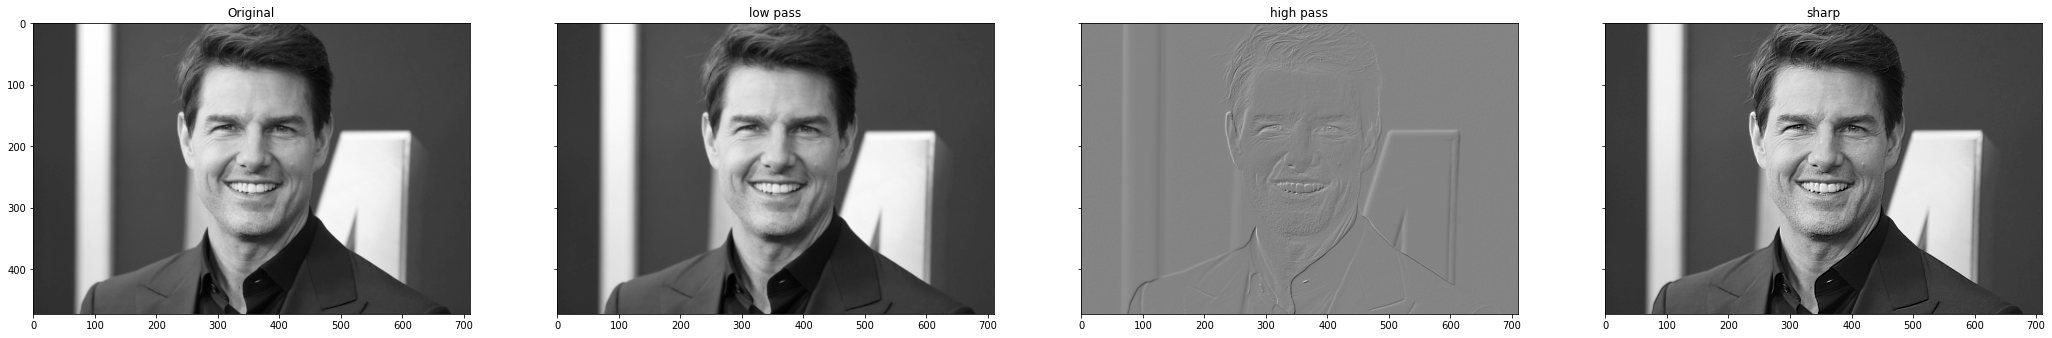

In [69]:
img = cv2.imread("tom.jpg",cv2.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma = 2
gaussian_1d = cv2.getGaussianKernel(2,sigma)

f_lp = cv2.sepFilter2D(img,-1,gaussian_1d,gaussian_1d)
f_hp = img -f_lp
f_sharpened = cv2.addWeighted(img,1.0,f_hp,2.0,0)

fig,axes = plt.subplots(1,4,sharex='all',sharey='all',figsize=(36,18))
axes[0].imshow(img,cmap = 'gray')
axes[0].set_title("Original")
#axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(f_lp,cmap = 'gray')
axes[1].set_title("low pass")
#axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(f_hp,cmap = 'gray')
axes[2].set_title("high pass")
#axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(f_sharpened,cmap = 'gray',vmin =0,vmax=255)
axes[3].set_title("sharp")
plt.show()

